<a href="https://colab.research.google.com/github/kiralynnashton/ComputerVision/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn
import glob
import os
import matplotlib.pyplot as plt
import cv2
from glob import iglob 
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn import metrics

     |████████████████████████████████| 1.0MB 18.0MB/s 


Download the images, unzip

In [ ]:
!wget https://s3.amazonaws.com/nist-srd/SD19/by_write.zip
!unzip by_write.zip

Streaming output truncated to the last 5000 lines.
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00198.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00131.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00091.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00011.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00106.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00044.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00168.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00136.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00077.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00017.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00239.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00057.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00019.png  
  inflating: by_write/hsf_1/f0802_22/c0802_22/c0802_22_00115.png  
  inflating

In [ ]:
!wget https://s3.amazonaws.com/nist-srd/SD19/by_write_md5.log

--2021-05-02 21:37:53--  https://s3.amazonaws.com/nist-srd/SD19/by_write_md5.log
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.97.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.97.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89568050 (85M) [application/octet-stream]
Saving to: ‘by_write_md5.log’

by_write_md5.log    100%[===================>]  85.42M   109MB/s    in 0.8s    

2021-05-02 21:37:54 (109 MB/s) - ‘by_write_md5.log’ saved [89568050/89568050]



In [ ]:
path='by_write/hsf_0/'
images=[]
labels=[]
fullims=[]
sub=0
for folder in os.listdir(path):
  sub=sub+1
  fpath=path+folder+'/c'+folder[1:]
  count=0
  for imfile in os.listdir(fpath):
    image = cv2.imread(fpath+'/'+imfile)#, cv2.IMREAD_GRAYSCALE)
    images.append(cv2.imread(fpath+'/'+imfile, cv2.IMREAD_GRAYSCALE).flatten())
    fullims.append(image)
    labels.append(sub)
    count=count+1

  if sub==10: break


In [ ]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
ims_pca = PCA(n_components=0.8)
ims_pca.fit(images)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
np.shape(ims_pca.components_)

(105, 16384)

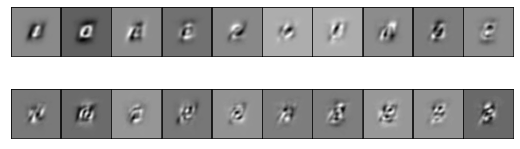

In [ ]:
# Example figure of 20 components

fig, axes = plt.subplots(2,10,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(ims_pca.components_[i].reshape(128,128),cmap='gray')
plt.savefig("example_pcs.png")

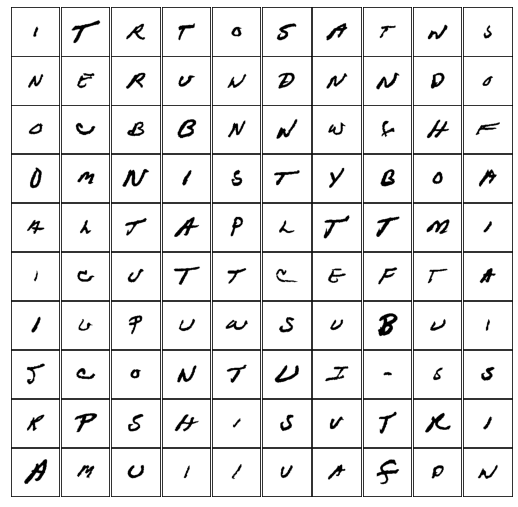

In [ ]:
# Figure showing a subset of characters from data

fig, axes = plt.subplots(10,10,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(images[i].reshape(128,128),cmap='gray')
plt.savefig("example_images.png")

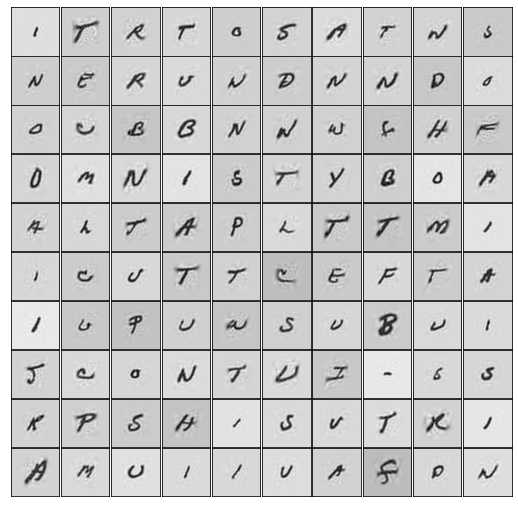

In [ ]:
# Same subset, converted to components and reconstructed 

components = ims_pca.transform(images)
projected = ims_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(128,128),cmap="gray")
plt.savefig("reconstructed_images.png")

# SVM

In [ ]:
from sklearn import datasets, svm, metrics

In [ ]:
n_imgs = len(images)
image_data = ims_pca.transform(images)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data,labels)

In [ ]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted = clf.predict(X_test)

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           1       0.57      0.36      0.44        45
           2       0.47      0.55      0.50        53
           3       0.59      0.82      0.69        55
           4       0.65      0.90      0.76        31
           5       0.69      0.41      0.51        27
           6       0.56      0.65      0.60        66
           7       0.58      0.53      0.55        68
           8       0.72      0.54      0.62        54
           9       0.38      0.56      0.45        50
          10       0.80      0.21      0.33        39

    accuracy                           0.56       488
   macro avg       0.60      0.55      0.54       488
weighted

In [ ]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))
confmat=metrics.confusion_matrix(y_test, predicted)

Confusion matrix:
[[16  5  2  3  0  3  6  0 10  0]
 [ 0 29  4  2  1  5  6  0  6  0]
 [ 2  0 45  0  0  6  2  0  0  0]
 [ 2  0  0 28  0  0  0  1  0  0]
 [ 0  4  6  0 11  5  0  0  1  0]
 [ 1  5  7  0  2 43  5  0  2  1]
 [ 4  5  7  0  2  8 36  3  2  1]
 [ 2  0  0  7  0  1  2 29 13  0]
 [ 1  9  2  3  0  2  3  2 28  0]
 [ 0  5  3  0  0  4  2  5 12  8]]


# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(fullims,labels)

In [ ]:
def one_hot_encode(x):

    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val-1] = 1
    
    return encoded

In [ ]:
testlab = one_hot_encode(y_test)
trainlab = one_hot_encode(y_train)
imtest = tf.convert_to_tensor(X_test)
labtest = tf.convert_to_tensor(testlab)
imtrain = tf.convert_to_tensor(X_train)
labtrain = tf.convert_to_tensor(trainlab)

In [ ]:
# mod1
model = models.Sequential()
model.add(layers.Conv2D(128, 5, dilation_rate=2,activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 5, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 128)     9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        3

In [ ]:
# mod2
model = models.Sequential()
model.add(layers.Conv2D(128, 5, dilation_rate=2,activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 5, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

layers.Dropout(0.5)

model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 120, 120, 128)     9728      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 128)       409728    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)       

In [ ]:
# mod3
model = models.Sequential()
model.add(layers.Conv2D(128, 5,activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, 5, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, 3, activation='relu'))

model.add(layers.Flatten())
#layers.Dropout(0.5)
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))


model.add(layers.Dense(10))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 124, 124, 128)     9728      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 58, 58, 128)       409728    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 27, 27, 64)        73792     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(imtrain, labtrain, epochs=10, 
                    validation_data=(imtest, labtest))

Epoch 1/10
46/46 [==============================] - 6s 118ms/step - loss: 25.8901 - accuracy: 0.1519 - val_loss: 2.0144 - val_accuracy: 0.2787
Epoch 2/10
46/46 [==============================] - 5s 109ms/step - loss: 1.8596 - accuracy: 0.3569 - val_loss: 1.7012 - val_accuracy: 0.3893
Epoch 3/10
46/46 [==============================] - 5s 109ms/step - loss: 1.3432 - accuracy: 0.5344 - val_loss: 1.4773 - val_accuracy: 0.4775
Epoch 4/10
46/46 [==============================] - 5s 110ms/step - loss: 0.9154 - accuracy: 0.6894 - val_loss: 1.2936 - val_accuracy: 0.5471
Epoch 5/10
46/46 [==============================] - 5s 110ms/step - loss: 0.6322 - accuracy: 0.7802 - val_loss: 1.3844 - val_accuracy: 0.5553
Epoch 6/10
46/46 [==============================] - 5s 110ms/step - loss: 0.4385 - accuracy: 0.8614 - val_loss: 1.3968 - val_accuracy: 0.5697
Epoch 7/10
46/46 [==============================] - 5s 110ms/step - loss: 0.2514 - accuracy: 0.9315 - val_loss: 1.5233 - val_accuracy: 0.5922
Epoch

17/17 - 0s - loss: 1.4718 - accuracy: 0.6814


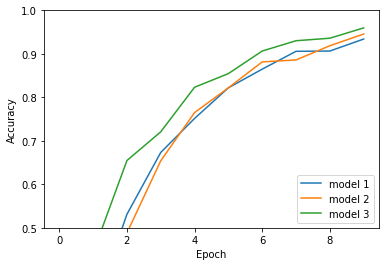

In [ ]:
# Figure showing accuracy over the epochs
plt.plot(history3.history['accuracy'], label='model 1')
plt.plot(history1.history['accuracy'], label='model 2')
plt.plot(history2.history['accuracy'], label='model 3')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imtest,  np.array(labtest), verbose=2)
#print(test_acc)
plt.savefig("modelcomptrainingplot.png")

In [ ]:
# model cv  
accuracy = 0

for i in range(0,10):
  model = models.Sequential()
  model.add(layers.Conv2D(128, 5,activation='relu', input_shape=(128,128,3)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, 5, activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, 3, activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, 3, activation='relu'))

  model.add(layers.Flatten())
  #layers.Dropout(0.5)
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))

  model.add(layers.Dense(10))


  model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  

  X_train, X_test, y_train, y_test = train_test_split(fullims,labels,test_size=0.5)
  testlab = one_hot_encode(y_test)
  trainlab = one_hot_encode(y_train)
  imtest = tf.convert_to_tensor(X_test)
  labtest = tf.convert_to_tensor(testlab)
  imtrain = tf.convert_to_tensor(X_train)
  labtrain = tf.convert_to_tensor(trainlab)

  history = model.fit(imtrain, labtrain, epochs=10, 
                      validation_data=(imtest, labtest))
  test_loss, test_acc = model.evaluate(imtest,  np.array(labtest), verbose=2)

  accuracy=accuracy+test_acc


accuracy = accuracy*10

accuracy






Epoch 1/10
33/33 [==============================] - 2s 60ms/step - loss: 35.1324 - accuracy: 0.1226 - val_loss: 2.0794 - val_accuracy: 0.1925
Epoch 2/10
33/33 [==============================] - 2s 52ms/step - loss: 1.8852 - accuracy: 0.3498 - val_loss: 1.6948 - val_accuracy: 0.4013
Epoch 3/10
33/33 [==============================] - 2s 52ms/step - loss: 1.3569 - accuracy: 0.5475 - val_loss: 1.3117 - val_accuracy: 0.5364
Epoch 4/10
33/33 [==============================] - 2s 52ms/step - loss: 0.9249 - accuracy: 0.7079 - val_loss: 1.1461 - val_accuracy: 0.6140
Epoch 5/10
33/33 [==============================] - 2s 52ms/step - loss: 0.6511 - accuracy: 0.7795 - val_loss: 1.1971 - val_accuracy: 0.5738
Epoch 6/10
33/33 [==============================] - 2s 53ms/step - loss: 0.4450 - accuracy: 0.8690 - val_loss: 1.3753 - val_accuracy: 0.5747
Epoch 7/10
33/33 [==============================] - 2s 52ms/step - loss: 0.3667 - accuracy: 0.8724 - val_loss: 1.2910 - val_accuracy: 0.6274
Epoch 8/10
3

60.82375556230545